<a href="https://colab.research.google.com/github/lMiaul/SI_TF/blob/feat%2Fjulian/Knmeans_Julian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
# Montar Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# Cargar el archivo CSV desde Google Drive usando un delimitador diferente
file_path = '/content/drive/MyDrive/SI/B. Generación Anual de residuos municipal_Distrital_2014_2021_0.csv'
data = pd.read_csv(file_path, delimiter=';', encoding='latin1')

In [5]:
# Mostrar las primeras filas del dataset para entender su estructura
print(data.head())

  FECHA_CORTE  N_SEC  UBIGEO REG_NAT DEPARTAMENTO    PROVINCIA     DISTRITO  \
0   9/01/2023      1   10101   SELVA     AMAZONAS  CHACHAPOYAS  CHACHAPOYAS   
1   9/01/2023      2   10102   SELVA     AMAZONAS  CHACHAPOYAS     ASUNCION   
2   9/01/2023      3   10103  SIERRA     AMAZONAS  CHACHAPOYAS       BALSAS   
3   9/01/2023      4   10104  SIERRA     AMAZONAS  CHACHAPOYAS        CHETO   
4   9/01/2023      5   10105  SIERRA     AMAZONAS  CHACHAPOYAS    CHILIQUIN   

   POB_TOTAL  POB_URBANA  POB_RURAL QRESIDUOS_MUN  PERIODO  
0      28423       27548        875       6939,28     2014  
1        291         151        140         47,95     2014  
2       1615         299       1316         69,95     2014  
3        597         388        209         90,84     2014  
4        737         197        540         46,26     2014  


In [6]:
# Verificar los nombres de las columnas en el DataFrame
print("Columnas en el DataFrame:", data.columns)


Columnas en el DataFrame: Index(['FECHA_CORTE', 'N_SEC', 'UBIGEO', 'REG_NAT', 'DEPARTAMENTO',
       'PROVINCIA', 'DISTRITO', 'POB_TOTAL', 'POB_URBANA', 'POB_RURAL',
       'QRESIDUOS_MUN', 'PERIODO'],
      dtype='object')


In [7]:
# Ajustar los nombres de las columnas de interés basándonos en la salida anterior
columns_of_interest = ['QRESIDUOS_MUN', 'POB_TOTAL', 'POB_URBANA', 'POB_RURAL', 'PERIODO']

In [8]:
# Seleccionar las columnas relevantes para el clustering
data_selected = data[columns_of_interest]
data_selected = data[columns_of_interest].replace(',', '.', regex=True).astype(float)


In [9]:
# Manejar valores nulos (si es necesario)
data_selected = data_selected.dropna()

In [ ]:
# Escalar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_selected)

In [ ]:
# Reducción de dimensionalidad para visualización
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)


In [ ]:
# Convertir los resultados PCA a DataFrame
pca_df = pd.DataFrame(data_pca, columns=['PCA1', 'PCA2'])

In [ ]:
# Aplicar K-means
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Agregar las etiquetas de K-means al DataFrame PCA
pca_df['KMeans_Labels'] = kmeans_labels

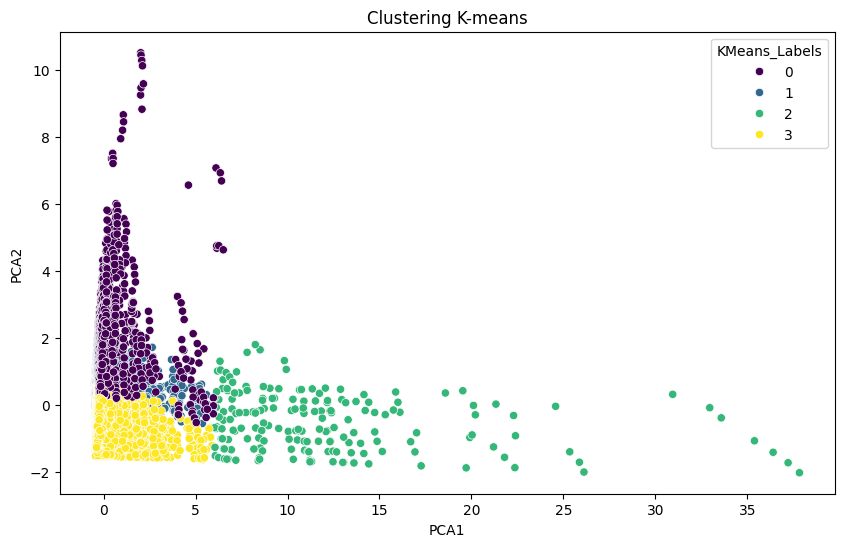

In [ ]:
# Visualización de K-means
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='KMeans_Labels', data=pca_df, palette='viridis', legend='full')
plt.title('Clustering K-means')
plt.show()

In [ ]:
# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(data_scaled)

In [ ]:
# Agregar las etiquetas de DBSCAN al DataFrame PCA
pca_df['DBSCAN_Labels'] = dbscan_labels

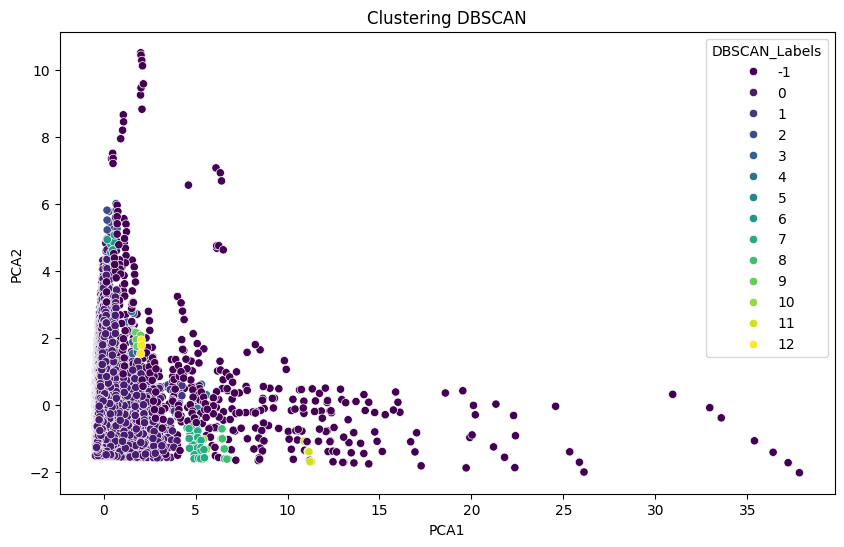

In [ ]:
# Visualización de DBSCAN
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='DBSCAN_Labels', data=pca_df, palette='viridis', legend='full')
plt.title('Clustering DBSCAN')
plt.show()

# Aplicación de KNN

In [10]:
# Separar características (X) y el target (y)
X = data_selected[['POB_TOTAL', 'POB_URBANA', 'POB_RURAL', 'PERIODO']]
y = data_selected['QRESIDUOS_MUN']

In [13]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
# Aplicar KNN para regresión
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [18]:
# Predecir en el conjunto de prueba
y_pred = knn.predict(X_test_scaled)

In [21]:
# Evaluar el desempeño del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 65262923.231085375
R-squared: 0.7815185153043376


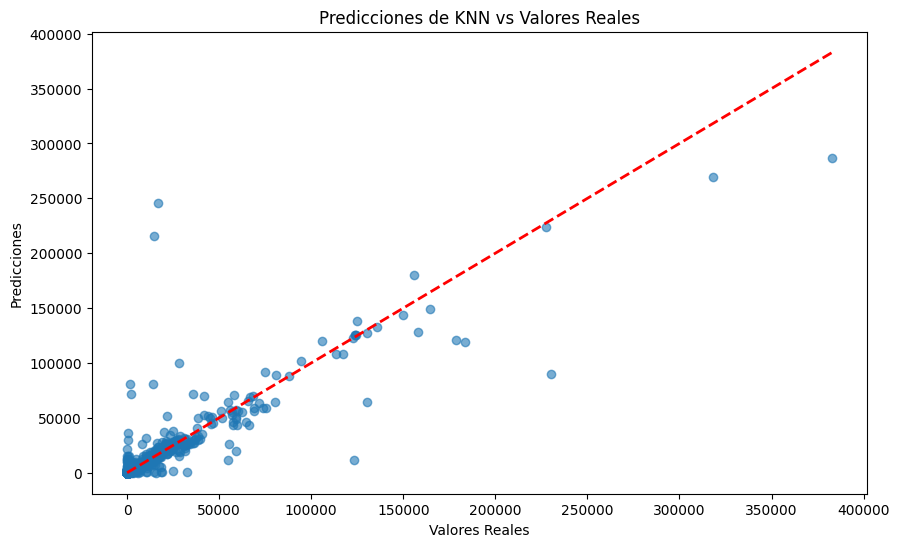

In [22]:
# Visualizar las predicciones vs los valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones de KNN vs Valores Reales')
plt.show()